

## 1. Aprendizaje con regresión lineal.

El modelo de regresión lineal  es una combinación lineal entre variables independientes para obtener otra variable, dependiente de éstas. Lo cual puede resultar bastante simple, pero, hoy en día, ha podido ser aplicado a varios problemas con buenos resultados, como predicción en finanzas y en medicina. Sin embargo, también puede ser un medio para aplicar un modelo más grande, por ejemplo utilizarlo para que, con el resuido, detectar *outliers*, rellenar vacíos/datos incompletos o aprender un *score* para ranquear objetos, lo que haremos en esta sección.

<img src="http://chanakya.ca/wp-content/uploads/2018/05/EstimateMultipleLinearRegressionCoefficientsExample_01.png" height="15%" />


El problema de *learning to rank* es aplicado comúnmente en *Information Retrieval* (IR). Sin embargo, el aprender ésta función puede ser crucial para modelar la importancia de distintos objetos.  


En esta actividad trabajaremos con el problema de predecir el *ranking* mundial de una Universidad en base a distintas características de ésta (dataset *World University Rankings*, a través del siguiente __[link](https://www.kaggle.com/mylesoneill/world-university-rankings)__) en la plataforma de *Kaggle*. En este problema el *ranking* es una medición de qué tan buena es la universidad e intentaremos predecirla a través un modelo simple de regresión lineal. En particular, dentro de los miles de diferentes sistemas de rankings, nacionales e internacionales, entre los cuales comúnmente existen desacuerdos entre ellos, trabajaremos con el ranking ampliamente considerado como uno de las más influyentes y ampliamente observadas: *Times Higher Education World University* .


> a) Cargue los datos a analizar, descargándolos desde la plataforma como se indicó, en formato *dataframe pandas*. Descríbalos adecuadamente, ya sea la variable dependiente o las independientes, si es que lo son.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("timesData.csv")
df.shape


(2603, 14)

In [2]:
df.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


## Sobre los datos:


Consideraremos como variable dependiente el puntaje total (total_score) debido a que como se quiere caracterizar mediante un puntaje cada universidad y luego para ponerle un rango, se ordenará de manera descendente para así no utilziar la variable world_rank.
* así consideraremos para la variable dependiente:
    1. total_score
* y como variables independientes:
    1. teaching
    2. international
    3. research 
    4. citations
    5. income 
    6. num_students
    7. student_staff_ratio
    8. international_student
    9. female_male_ratio
* Las variables que no se utilizarán en la regresión alineal excepto para reconocer la universisad en cuestión será:
    1. world_rank (porque es lo mismo que  total_Score ordenado descendiente)
    2. university_name (por ser string)
    3. Country (por ser string)
    4. year (Si bien el año cambia, el ranking no)
    

In [3]:
df.head(2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011


> b) Debido a la estructura será necesario realizar un leve pre-proceso. Existen vacíos entre los datos o valores '-', por lo que será necesario eliminarlos (*o si piensa una mejor manera de manejar ésto puede hacerlo, se verá reflejado en su nota*). Además de ésto deje los datos con *score unkown* o '-' en un conjunto *target* separado, *unlabeled data* (éste será el objetivo del entrenamiento) ¿Cuántos datos quedan en cada conjunto? 

In [2]:
def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos

nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical

nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))
nuevo_df['student_staff_ratio'] = df['student_staff_ratio']
print(nuevo_df.shape)

df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print(nuevo_df.shape)
nuevo_df.head(10)

(2174, 82)
(954, 82)


,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,female,male
1,2,California Institute of Technology,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,...,0,0,0,0,0,0,0,1,33,67
2,3,Massachusetts Institute of Technology,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,...,0,0,0,0,0,0,0,1,37,63
3,4,Stanford University,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,...,0,0,0,0,0,0,0,1,42,58
5,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,...,0,0,0,0,0,0,1,0,46,54
6,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,...,0,0,0,0,0,0,1,0,46,54
8,9,Imperial College London,89.2,90.0,94.5,88.3,92.9,90.6,15060,11.7,...,0,0,0,0,0,0,1,0,37,63
12,13,Johns Hopkins University,80.9,58.5,89.2,92.3,100.0,86.4,15128,3.6,...,0,0,0,0,0,0,0,1,50,50
13,14,Cornell University,82.2,62.4,88.8,88.1,34.7,83.9,21424,10.2,...,0,0,0,0,0,0,0,1,48,52
15,15,University of Michigan,83.9,53.3,89.1,84.1,59.6,83.4,41786,9.0,...,0,0,0,0,0,0,0,1,48,52
18,19,University of Pennsylvania,71.8,32.9,82.7,93.6,43.7,79.5,20376,6.5,...,0,0,0,0,0,0,0,1,51,49


Para el  pre-procesamiento de datos se consideraron dos métodos para limpiar las filas que posean un dato atipico respecto a lo que se espera. Esto fue:


A. Mediante la forma establecida:
    1. Se elimina cada entrada nula
    2. cada entrada que posea un "-" se cambia por el valor "unknown"
    3. se categoriza cada pais transformandolos en una columna que posee un valor binario según corresponda.
    4. las entradas que tengan el valor "unknown" de la columna "total score" es nuestro valor que queremos obtener. (datos de prueba).
    5. female_male_ratio se separa mediante un split para tener las proporciones en cantidades enteras.
    
    * la tabla se redujo de 2603 filas a 2174, es decir, ¡se eliminaron 429 filas!
    
B. Mediante nuestra propuesta:

            * En Machine Learning la información es muy importante al momento de generar un entrenamiento y si  más aún cuando se eliminan 429 filas y que los datos no reconocidos se aproxime directamente por un cero. por lo que mediante esta propuesta se buscará obtener un valor cercano al que se pretende para tener más información en nuestro entrenamiento que afecte poco al desarrollo de nuestra regresión lineal siguiendo los siguientes pasos:
            1. Sea n la posicion de la fila que falta, llamaremos filas vecinas a n-1 y n+1.
            2. respecto a los vecinos más cercanos al igual que en piecewise interpolation se calcula el punto medio entre las dos variables considerando un reescale dependiendo de la diferencia entre el total score para reducir el lugar de posibilidades para donde se encontrará el punto que intentamos hallar.
            3. A través de la diferencia del error se obtendrá un intervalo de confianza sobre el cual estará el valor más cercano al faltante
            4. se buscará el vecino más cercano para definir el único signo a considerar.
            5. sobre dicho intervalo se aplicará una función random para obtener nuestro valor.
            

          

In [5]:
%%latex
B. En Machine Learning la información es muy valiosa, por tanto, se debe evitar a toda costa la eliminación de filas que se hace en el algoritmo anterior. De esta forma, 
se considera rellenar los valores en blanco con valores cercanos siguiendo el algoritmo que se proporne bajo los siguientes supuestos.

Asumiremos que existe una función $f$ continua y bien definida tal que $f_{i}(x_{1},x_{2},...,x_{n}) = total score(i)$ donde $i$ corresponde a la fila de la tabla y los $x_{j}$
corresponden a los valores numericos de la tabla a utilizar en nuestra regresión. dado que independiente del error de nuestra regresión, la función será continua.

Si falta un dato, sin perdida de generalidad, supongamos que nos falta uno y será de la forma $x_{2} = '-'$ (previamente todos los valores Nan y distintos, se reemplazarán por '-' para mejorar el analisis de los datos en cuestion)
nuestra meta es buscar un intevalo donde podría pertenecer nuestro valor perdido. Esto en teoría no debería aumentar el error en la estimación, sino debiese quitar un poco de peso a algunas variables, por eso se decidió utilziar este método, ya que de por si es dinamico.

Nuestro primer objetivo es encontrar los valores más cercanos al $totalscore$ de nuestra variable perdida para ver sobre cual posee un valor más cercano, para así tener más presición sobre el valor que podría tomar. Esto resulta fácil por el hecho de que el ranking esta ordenado desde el primero hasta el último, pero por otra parte surge un nuevo inconveniente y es que alguno de los valores más cercanos tambien este perdido por lo que se pueden contemplar dos opciones:

- iterar las columnas ya sea la superior o la inferior hasta hallar un valor que nos sirva ( esta se uso)
- pasar hasta encontrar un valor perdido tal que la superior e inferior existan, pero considerando un rango maximo para las iteraciones (a lo más 2 ó 3) y luego seguir iterando hasta que ninguno quede con algun dato vacio.

luego para ver hacia que valor se acerca más se considera una particion sobre el intervalo en cuestion entre el valor superior e inferior, y $\nabla$ como la proporcion entre el valor más grande y el mas chico del score, de modo que entre más cercano a 1, más cercano es al superior o al cero al inferior. 



          $$ \nabla_i = \frac{(|y[i-1] - y[i+1]|)}{(|y[i-1] - y[i+1]| + 0.1}$$
Donde esta proporcion se ve refejada en el totalscore, lo que nos da una aproximacion hacia que valor está más cercano y esto fue obtenido interpolando valores deseados dada una entrada.
Luego para calcular el largo del intervalo a considerar, aparte de la diferencia entre el valor superior en inferior del valor, un coeficiente que entre más variacion habia, mas chico es el intervalo a considerar partiendo desde la proporcion dada por $\nabla$.                                                     
    $$Error_{low} = \sum_{n=0}^{n=8}min\{|x_{n} - x_{n+1}|, |x_{n} - x_{n+1}|\}$$
    $$Error_{high}\sum_{n=0}^{n=8}max\{|x_{n} - x_{n+1}|, |x_{n} - x_{n+1}|\}$$
    calculamos el intervalo de confianza como:
        $$\bar{E} = \frac{Error_{low}}{Error_{high}}$$
        $$\Delta = (|x_{2}[i-1] - x_{2}[i+1]| ))\cdot \bar{E}$$
        Finalmente
        $$x_{2}[i] \in B(x_{2}[i-1] - x_{2}[i+1]|)\nabla_i,\Delta)        $$
        obteniendolo considerando un valor al azar.
        
        
        

<IPython.core.display.Latex object>

> c) Cree las matrices de cada conjunto con las que trabajará. Además de ésto separe el conjunto de pruebas fijo que se utilizará, recuerde que éste no puede ser utilizado. Si estima conveniente también cree conjunto de validación.

In [16]:
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
X_test = X_test.astype('float32')
X.shape
#X_train = X.sample(600)




(954, 79)

In [17]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
Y_train = Y #if you want to create val!

>d) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar ésto.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
#scaler = StandardScaler(with_mean=True, with_std=True)
#scaler.fit(y_train)
#y_train_scaled = scaler.transform(y_train)
X_test_scaled = scaler.transform(X_test)

> e) Realice una regresión lineal de mı́nimos cuadrados básica. Mida el residuo de cada predicción en cada dato y haga un gráfico de éste ¿Qué indica lo observado?

C:\Users\kzep\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


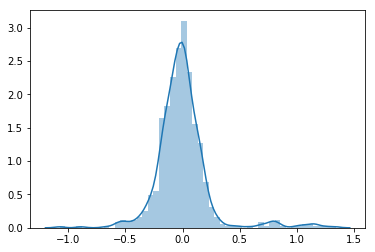

In [35]:
from sklearn.linear_model import LinearRegression as LR
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)

import seaborn as sns
res = y_train-linreg.predict(X_train_scaled)
sns.distplot(res)

> f) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? Compare y comente ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

> g) Calcule la información mútua de los distintos predictores (variables) con respecto a la variable *output* o *target*. Comente con lo calculado anteriormente y si le parece razonable.

In [37]:
from sklearn.feature_selection import mutual_info_regression
minfo_predictor = mutual_info_regression(X,Y)

> h)  Construya una función que implemente *Forward Step-wise Selection* (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.

In [43]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        #remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ...",names_x[best_candidate])
        print ("totalvars=%d, mse = %f",(len(indexes),best_new_score))
    return selected
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
fss(X_train_scaled,y_train,names_regressors)

selected = %s ... teaching
totalvars=%d, mse = %f (2, 27.585627)
selected = %s ... citations
totalvars=%d, mse = %f (3, 10.429185)
selected = %s ... research
totalvars=%d, mse = %f (4, 2.4416435)
selected = %s ... international
totalvars=%d, mse = %f (5, 0.31502423)
selected = %s ... income
totalvars=%d, mse = %f (6, 0.06944919)
selected = %s ... country_Egypt
totalvars=%d, mse = %f (7, 0.064532675)
selected = %s ... year
totalvars=%d, mse = %f (8, 0.061103567)
selected = %s ... country_United States of America
totalvars=%d, mse = %f (9, 0.059326045)
selected = %s ... num_students
totalvars=%d, mse = %f (10, 0.05894841)
selected = %s ... country_Spain
totalvars=%d, mse = %f (11, 0.058592193)
selected = %s ... country_France
totalvars=%d, mse = %f (12, 0.05836962)
selected = %s ... international_students
totalvars=%d, mse = %f (13, 0.058097094)
selected = %s ... country_New Zealand
totalvars=%d, mse = %f (14, 0.05790925)
selected = %s ... country_Turkey
totalvars=%d, mse = %f (15, 0.057

[78,
 0,
 3,
 2,
 1,
 4,
 23,
 9,
 76,
 5,
 66,
 26,
 7,
 48,
 71,
 18,
 37,
 36,
 14,
 47,
 65,
 69,
 27,
 42,
 67,
 8,
 11,
 58,
 29,
 15,
 61,
 35,
 12,
 50,
 2,
 18,
 37,
 42,
 69,
 61,
 9,
 27,
 61,
 68,
 8,
 48,
 18,
 15,
 18,
 69,
 35,
 2,
 9,
 65,
 25,
 22,
 68,
 2,
 9,
 10,
 65,
 35,
 36,
 61,
 26,
 37,
 67,
 26,
 25,
 25,
 26,
 37,
 15,
 37,
 15,
 50,
 29,
 65,
 14]

> i) Ajuste un modelo lineal utilizando “*Ridge Regression*”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^0, 10^6$], variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Deje un gráfico sólo para analizar los coeficientes de los países. Describa lo que observa.

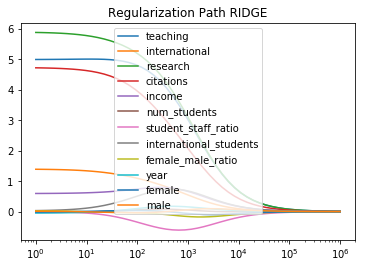

Text(0.5,1,'Regularization Path RIDGE of country coefs')

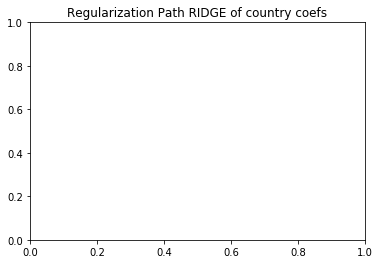

In [48]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend()
plt.show()
...#modify
if "country" in label:
    plt.plot(alphas_, y_arr, label=label)
plt.title('Regularization Path RIDGE of country coefs')

> j) Ajuste un modelo lineal utilizando el método “*Lasso*”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^{-2},10^3$]. Para obtener el código, modifique el ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

In [45]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(-2,3,base=10)
model = Lasso(fit_intercept=True)

country_alphas_ = np.logspace(-5,0,base=10)

> k) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un gráfico que muestre el error de entrenamiento y el de pruebas como función del parámetro de regularización. Discuta lo que  observa.

In [46]:
alphas_ = #choose it
coefs = []
model = #choose it
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge/lasso')
ax.plot(alphas_,mse_test,label='test error ridge/lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

SyntaxError: invalid syntax (<ipython-input-46-f4acfbe2dc93>, line 1)

> l) Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de la técnica validación cruzada con un número de folds igual a $K= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Mida el error real del modelo (ésto es sobre el conjunto de pruebas). Debido a la escala del error puede utilizar auxiliarmente *MAE* como métrica de desempeño. Compare y concluya.

In [47]:
yhat_test = linreg.predict(X_test_scaled)
mse_test = np.mean(np.power(yhat_test - y_test, 2))
from sklearn.model_selection import KFold
K=10
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(X_train_scaled):
    linreg = LR(fit_intercept=True, n_jobs=1)
    linreg.fit(X_train_scaled[train], y_train[train])
    yhat_kfold_val = linreg.predict(X_train_scaled[val])
    mse_fold = np.mean(np.power(yhat_kfold_val - y_train[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / K
...#or MAE
mae_fold = np.mean(np.abs(yhat_kfold_val - y_train[val]))

> m) Con el modelo que se piense que es el mejor, en base a todo lo experimentado. Realice el *ranking* de las universidades del que no se tienen etiquetas (*unlabeled data* o *target data*) a través de predecir los datos que se dejaron como *pruebas* y ordenar su score en el *dataframe*.


In [49]:
df_test["total_score"] = model.predict(X_test_scaled) #predict score
...#armar un raking
univ_chilenas = df_test[df_test["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s" %(ranking,row["university_name"]))
    ranking+=1

ValueError: Length of values does not match length of index